In [819]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

import warnings
warnings.filterwarnings('ignore')

In [820]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [821]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [822]:
df.shape

(614, 13)

In [823]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [824]:
df.isnull().sum().sum()

149

In [825]:
df.duplicated().sum()

0

In [826]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

---Gender

No. of people who applied for loan grouped by gender :-
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

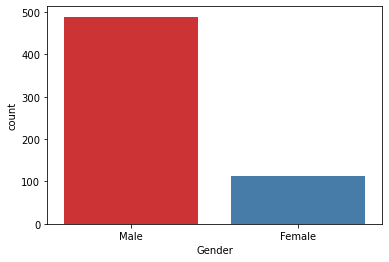

In [827]:
print("No. of people who applied for loan grouped by gender :-")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set1')

Most of the applicants are male

---Maritial Status

No. of people who applied for loan grouped as per their Maritial Status :-
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

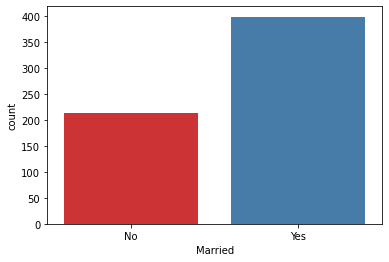

In [828]:
print("No. of people who applied for loan grouped as per their Maritial Status :-")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set1')

Most loan applicants are married

---Dependents

No. of people who applied for loan grouped as how many dependents are there :-
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

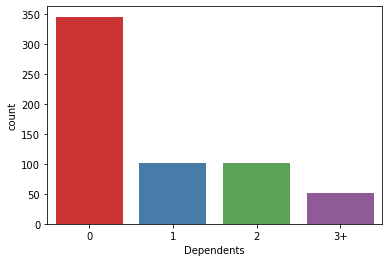

In [829]:
print("No. of people who applied for loan grouped as how many dependents are there :-")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette = 'Set1')

345 applicants have are of no dependents, 102 applicants with 1 dependent, 101 applicants with 2 dependents and 51 applicants with 3 or more than 3 dependents

---Self Employed

No. of people who applied for loan grouped as they are self wmployed or not :-
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

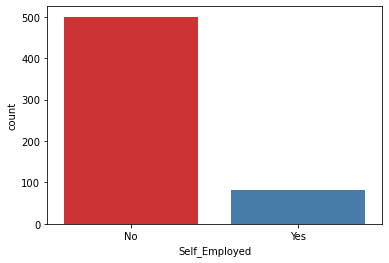

In [830]:
print("No. of people who applied for loan grouped as they are self wmployed or not :-")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set1')

500 people are self employed and 82 are not

--- Loan Amount (in thousands)

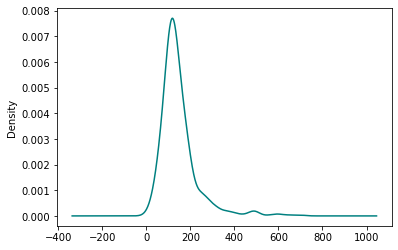

In [831]:
df["LoanAmount"].plot(kind='kde', color='teal')
plt.show()

Most of the loan amount lies till 400 thousand rs

---Loan Amount Term (in Months)

Term of loan in months :-
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

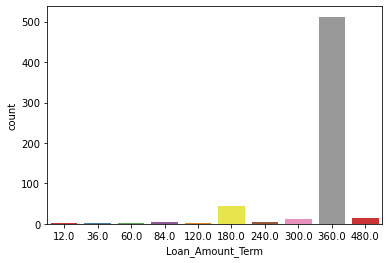

In [832]:
print("Term of loan in months :-")
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'Set1')

Most of the loan term is 360 months

---Credit History

Credit history metting the guidelines :-
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

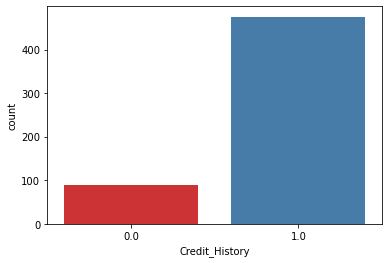

In [833]:
print("Credit history metting the guidelines :-")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set1')

475 loan applications meeting the credit score guidelines

Gender will be impute with male which is most common answer

married will be impute with yes which is most common answer

Dependents will be impute with 0 which is most common answer

Self_Employed will be impute with no which is most common answer

LoanAmount will be impute with mean of the data

Loan_Amount_Term will be impute with 360 which is most common answer

Credit_History will be impute with 1.0 which is most common answer

In [834]:
df['Gender'].fillna(df['Gender'].value_counts().idxmax(), inplace=True)
df['Married'].fillna(df['Married'].value_counts().idxmax(), inplace=True)
df['Dependents'].fillna(df['Dependents'].value_counts().idxmax(), inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].value_counts().idxmax(), inplace=True)
df["LoanAmount"].fillna(df["LoanAmount"].mean(skipna=True), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)

In [835]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [836]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Encoding

In [838]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
Property_Area
Loan_Status


In [839]:
df['Credit_History'].unique()

array([1., 0.])

In [884]:
le = LabelEncoder()

Loan_ID_encoding = le.fit_transform(df['Loan_ID'])

Gender_encoding = le.fit_transform(df['Gender'])

Married_encoding = le.fit_transform(df['Married'])

Dependents_encoding = le.fit_transform(df['Dependents'])

Education_encoding = le.fit_transform(df['Education'])

Self_Employed_encoding = le.fit_transform(df['Self_Employed'])

Property_Area_encoding = le.fit_transform(df['Property_Area'])

Loan_Status_encoding = le.fit_transform(df['Loan_Status'])

In [885]:
df['Loan_ID'] = Loan_ID_encoding
df['Gender'] = Gender_encoding
df['Married'] = Married_encoding
df['Dependents'] = Dependents_encoding
df['Education'] = Education_encoding
df['Self_Employed'] = Self_Employed_encoding
df['Property_Area'] = Property_Area_encoding
df['Loan_Status'] = Loan_Status_encoding

In [886]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 62.5 KB


In [888]:
df.dtypes

Loan_ID                int64
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [889]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.072991,-0.554487,-5.786179e-18,0.299776,0.411733,2,1
1,1,1,1,1,0,0,-0.134412,-0.038732,-2.192733e-01,0.299776,0.411733,0,0
2,2,1,1,0,0,1,-0.393747,-0.554487,-9.576410e-01,0.299776,0.411733,2,1
3,3,1,1,0,1,0,-0.462062,0.251980,-3.145466e-01,0.299776,0.411733,2,1
4,4,1,0,0,0,0,0.097728,-0.554487,-6.445428e-02,0.299776,0.411733,2,1


In [870]:
df.shape

(614, 13)

In [871]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,6.140000e+02,614.000000,614.000000,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,614.000000,614.000000
mean,306.500000,0.817590,0.653094,-1.766593e-16,0.218241,0.133550,-3.313491e-17,-2.712271e-17,1.952835e-17,-1.788291e-16,1.352519e-16,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.000815e+00,0.413389,0.340446,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,0.787482,0.463973
min,0.000000,0.000000,0.000000,-7.378063e-01,0.000000,0.000000,-8.606493e-01,-5.544873e-01,-1.636463e+00,-6.918355e+00,-2.428760e+00,0.000000,0.000000
25%,153.250000,1.000000,0.000000,-7.378063e-01,0.000000,0.000000,-4.138159e-01,-5.544873e-01,-5.497524e-01,2.997758e-01,4.117327e-01,0.000000,0.000000
50%,306.500000,1.000000,1.000000,-7.378063e-01,0.000000,0.000000,-2.606393e-01,-1.480047e-01,-2.073642e-01,2.997758e-01,4.117327e-01,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.534696e-01,0.000000,0.000000,6.414426e-02,2.312023e-01,2.183882e-01,2.997758e-01,4.117327e-01,2.000000,1.000000
max,613.000000,1.000000,1.000000,2.236021e+00,1.000000,1.000000,1.238462e+01,1.369617e+01,6.592764e+00,1.202042e+00,4.117327e-01,2.000000,1.000000


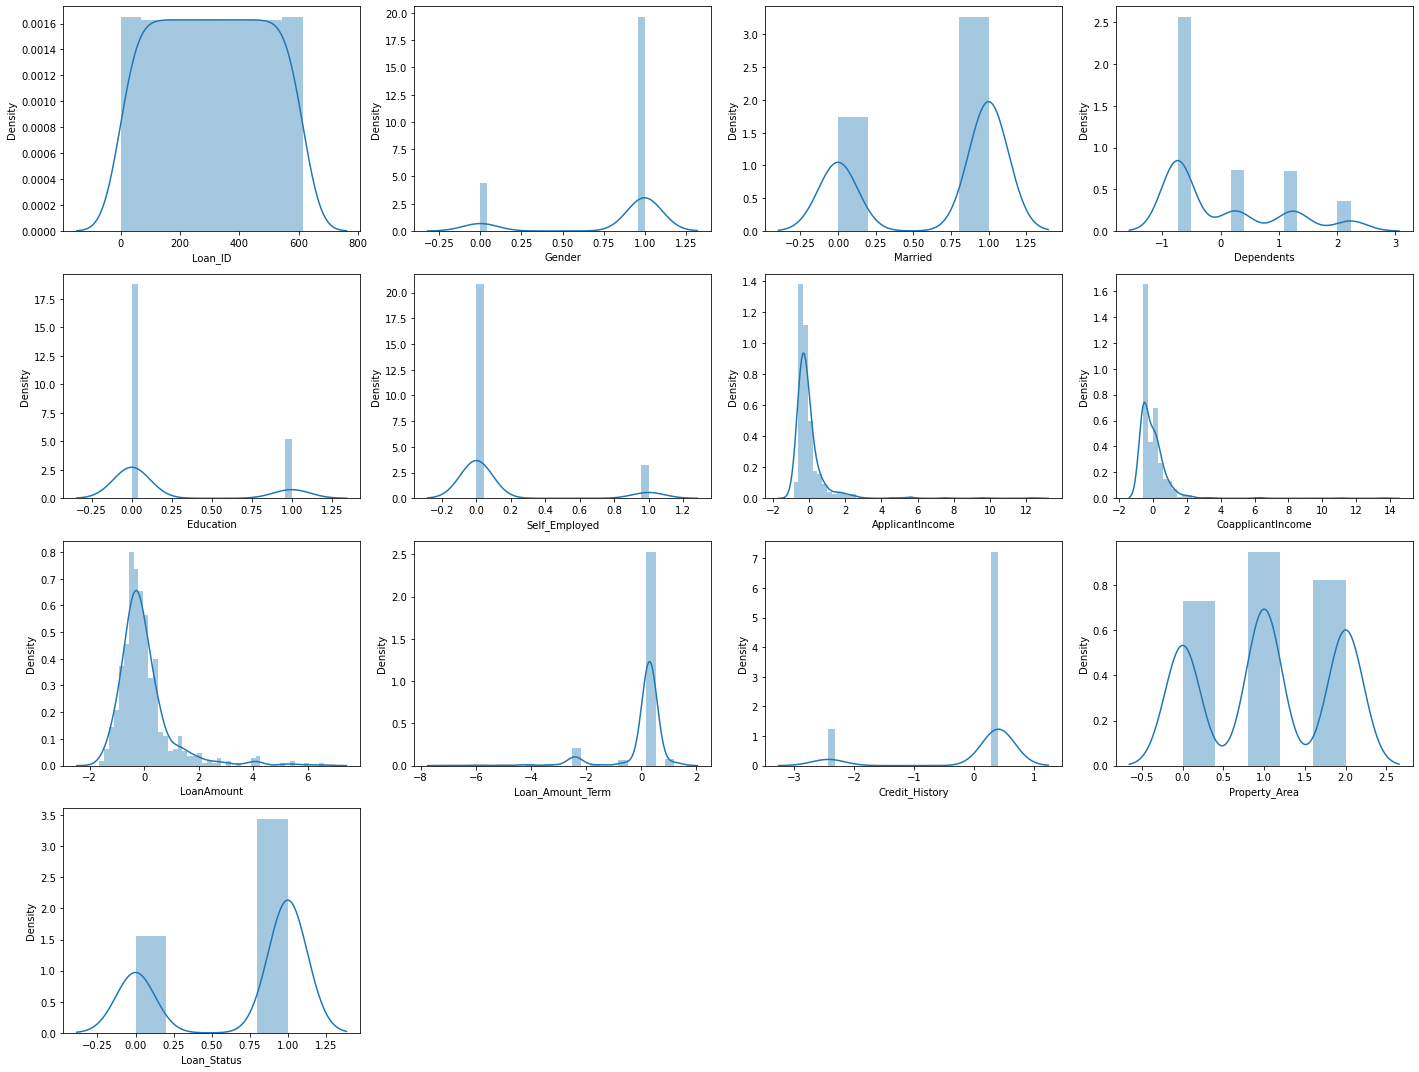

In [872]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df:
    if plotnumber <= 13:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        
        plotnumber += 1
plt.tight_layout()

Checking Co-relation

In [873]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.036504,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.065494,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.082642,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.096377,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.076414,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.029184,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.038808,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.052472,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.037500,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.036504,-0.065494,-0.082642,-0.096377,-0.076414,-0.029184,-0.038808,-0.052472,0.037500,1.000000,-0.002379,-0.086578,-0.005679


<AxesSubplot:>

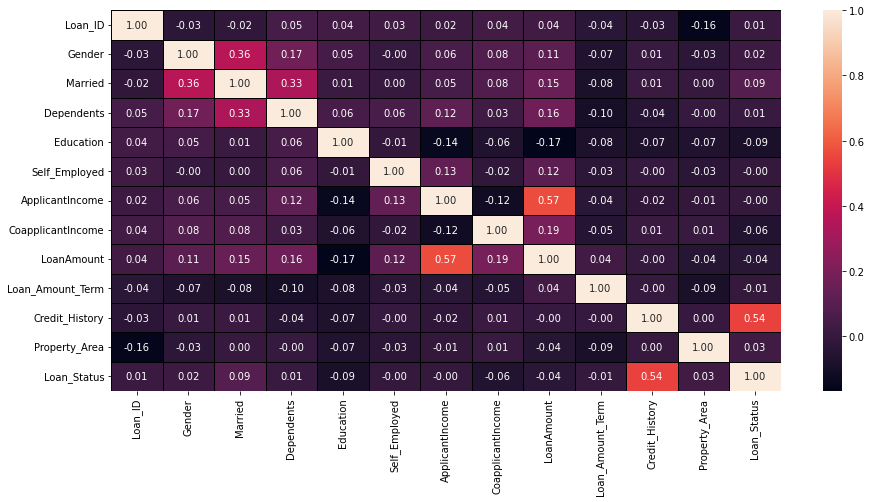

In [874]:
plt.figure(figsize=(15,7))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='0.2f')

In [875]:
df.corr()['Loan_Status']

Loan_ID              0.011773
Gender               0.017987
Married              0.091478
Dependents           0.010118
Education           -0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.005679
Credit_History       0.540556
Property_Area        0.032112
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [876]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = variance_inflation_factor

In [877]:
v = df.drop('Loan_Status',axis=1)

In [878]:
vif_data=pd.DataFrame()
vif_data['Feature']=v.columns

In [890]:
vif_data['VIF']=[variance_inflation_factor(v.values,i)
                    for i in range(len(v.columns))]
    
print(vif_data)

              Feature       VIF
0             Loan_ID  2.775538
1              Gender  4.680253
2             Married  3.478931
3          Dependents  1.123245
4           Education  1.337408
5       Self_Employed  1.163731
6     ApplicantIncome  1.627366
7   CoapplicantIncome  1.136467
8          LoanAmount  1.703929
9    Loan_Amount_Term  1.032304
10     Credit_History  1.008933
11      Property_Area  2.200663


# Model Building

In [891]:
x = df.drop(columns=['Loan_Status','Loan_ID'], axis=1)
y = df['Loan_Status']

# Decision Tree Classifier

In [892]:
dt=DecisionTreeClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    dt.fit(x_train,y_train)
    y_pred_test = dt.predict(x_test)
    y_pred_train = dt.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.7792207792207793 Max Random State 13


# Logistic Regression

In [893]:
lr=LogisticRegression()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred_test = lr.predict(x_test)
    y_pred_train = lr.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8701298701298701 Max Random State 63


# Random Forest Classifier

In [894]:
rf=RandomForestClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8506493506493507 Max Random State 63


# K Neighbors Classifier

In [895]:
knn = KNeighborsClassifier()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    knn.fit(x_train,y_train)
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8571428571428571 Max Random State 104


We observed maximum score for Logistics Regressor, Will hypertune both model

Logistics Regressor

In [896]:
gcv = GridSearchCV

In [909]:
params = {
    'C' : np.logspace(-4, 4, 20),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'],

         }

In [910]:
hypt = gcv(lr, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

In [911]:
lr = LogisticRegression(C=0.615848211066026, penalty= 'l1', solver= 'liblinear')

In [912]:
lr=LogisticRegression()
maxAcc = 0
maxRS = 0

for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=i)
    lr.fit(x_train,y_train)
    y_pred_test = lr.predict(x_test)
    y_pred_train = lr.predict(x_train)
    acc=accuracy_score(y_test, y_pred_test)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
    
print('Testing Max Accuracy', maxAcc, 'Max Random State', maxRS)
    


Testing Max Accuracy 0.8701298701298701 Max Random State 63


# Score Report of the Model

In [913]:
#Testing Report
print(classification_report(y_test , y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.40      0.56        47
           1       0.79      0.98      0.88       107

    accuracy                           0.81       154
   macro avg       0.85      0.69      0.72       154
weighted avg       0.82      0.81      0.78       154



In [914]:
#Training Report
print(classification_report(y_train , y_pred_train))

              precision    recall  f1-score   support

           0       0.93      0.45      0.60       145
           1       0.79      0.98      0.88       315

    accuracy                           0.82       460
   macro avg       0.86      0.72      0.74       460
weighted avg       0.84      0.82      0.79       460



# Confusion Matrix

<AxesSubplot:>

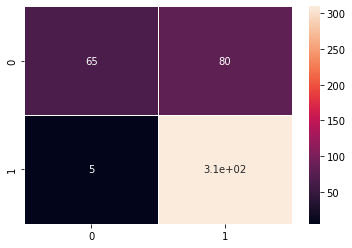

In [915]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmtrain, annot = True, linewidth=0.5)

<AxesSubplot:>

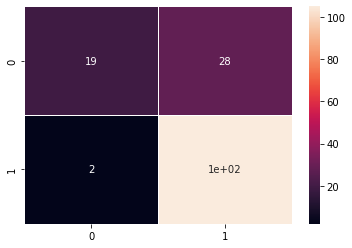

In [916]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

# AUC ROC curve

In [917]:
from sklearn.metrics import plot_roc_curve, auc
from sklearn.metrics import plot_roc_curve

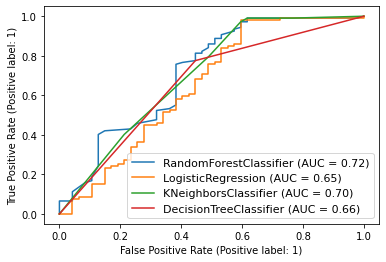

In [918]:
disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)


plt.legend(prop = {'size':11}, loc ='lower right')

Accuracy is more for logistics regression model, and AUC is more for Random forest classifier, will save both the models, after checking the socre again and confusion matrix, final model will be selected

# Saving Model

In [919]:
import pickle

In [ ]:
pickle.dump('rf', open('Randomforest_model_for_Loan_prediction', 'wb'))

In [920]:
pickle.dump('rf', open('Logisticregressor_model_for_Loan_prediction', 'wb'))